<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMDB-Movie-Review-Sentiment-Classification" data-toc-modified-id="IMDB-Movie-Review-Sentiment-Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMDB Movie Review Sentiment Classification</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Process" data-toc-modified-id="Process-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Process</a></span></li><li><span><a href="#Configure-notebook,-import-libraries,-and-import-dataset" data-toc-modified-id="Configure-notebook,-import-libraries,-and-import-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Configure notebook, import libraries, and import dataset</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Define-global-variables" data-toc-modified-id="Define-global-variables-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Define global variables</a></span></li><li><span><a href="#Import-labeled-data" data-toc-modified-id="Import-labeled-data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Import labeled data</a></span></li></ul></li><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Helper Functions</a></span></li><li><span><a href="#Examine-the-data" data-toc-modified-id="Examine-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Examine the data</a></span></li><li><span><a href="#Cleaning-and-preprocessing" data-toc-modified-id="Cleaning-and-preprocessing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Cleaning and preprocessing</a></span><ul class="toc-item"><li><span><a href="#Load-training-data" data-toc-modified-id="Load-training-data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Load training data</a></span></li><li><span><a href="#Write-helper-functions" data-toc-modified-id="Write-helper-functions-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Write helper functions</a></span><ul class="toc-item"><li><span><a href="#Sentence-cleaner" data-toc-modified-id="Sentence-cleaner-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Sentence cleaner</a></span></li></ul></li><li><span><a href="#Create-list-of-Doc2Vec-TaggedDocument-objects" data-toc-modified-id="Create-list-of-Doc2Vec-TaggedDocument-objects-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Create list of Doc2Vec TaggedDocument objects</a></span></li></ul></li><li><span><a href="#Train-Doc2Vec-model" data-toc-modified-id="Train-Doc2Vec-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Train Doc2Vec model</a></span></li><li><span><a href="#Classification-model-training-and-evaluation" data-toc-modified-id="Classification-model-training-and-evaluation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Classification model training and evaluation</a></span><ul class="toc-item"><li><span><a href="#Kaggle-model" data-toc-modified-id="Kaggle-model-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Kaggle model</a></span></li><li><span><a href="#Standard-write-up-models" data-toc-modified-id="Standard-write-up-models-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Standard write-up models</a></span><ul class="toc-item"><li><span><a href="#Standard-model-comments" data-toc-modified-id="Standard-model-comments-9.2.1"><span class="toc-item-num">9.2.1&nbsp;&nbsp;</span>Standard model comments</a></span></li></ul></li></ul></li><li><span><a href="#Tuning-Doc3Vec" data-toc-modified-id="Tuning-Doc3Vec-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Tuning Doc3Vec</a></span></li><li><span><a href="#Combining-Doc2Vec-models" data-toc-modified-id="Combining-Doc2Vec-models-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Combining Doc2Vec models</a></span></li><li><span><a href="#Increased-vocabulary-and-combined-Doc2Vec-models" data-toc-modified-id="Increased-vocabulary-and-combined-Doc2Vec-models-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Increased vocabulary and combined Doc2Vec models</a></span></li><li><span><a href="#Manual-training-of-combined-Doc2Vec-model-with-increased-vocab-and-diminishing-alpha" data-toc-modified-id="Manual-training-of-combined-Doc2Vec-model-with-increased-vocab-and-diminishing-alpha-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Manual training of combined Doc2Vec model with increased vocab and diminishing alpha</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

<h1>IMDB Movie Review Sentiment Classification</h1>

<img style="float: left; margin-right: 15px; width: 30%; height: 30%;" src="images/imdb.jpg" />

# Purpose

The overall goal of this set of write-ups is to explore a number of machine learning algorithms utilizing natural language processing (NLP) to classify sentiment IMDB movie reviews.

The specific goals of this write-up include:
1. Create a set of word embeddings from the IMDb movie review text utilizing [Word2vec](https://en.wikipedia.org/wiki/Word2vec)
2. Cluster the embeddings utilizing a K-nearest neighbors algorithm into a set of centroids
2. Run the models from the [last write-up](./Model-06.ipynb) against the centroid feature set
3. Determine if the centroid feature set improves our ability to correctly classify movie review sentiment

References:
* This series of write-ups is inspired by the Kaggle [
Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial) competition.
* [Gensim Doc2Vec](https://radimrehurek.com/gensim/models/doc2vec.html)
* [smart_open](https://pypi.org/project/smart_open/)

Dataset source:  [IMDB Movie Reviews](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)

# Process

Previously covered [here](./Model-06.ipynb#Process).

# Configure notebook, import libraries, and import dataset

## Import libraries

In [247]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import smart_open

import pandas as pd
from pandas import set_option

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#from sklearn.pipeline import Pipeline
#from sklearn.pipeline import FeatureUnion

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import GridSearchCV

#from sklearn.preprocessing import StandardScaler

#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score

#from sklearn.cluster import KMeans


# http://www.nltk.org/index.html
# pip install nltk
import nltk
from nltk.corpus import stopwords


# Creating function implementing punkt tokenizer for sentence splitting
import nltk.data

# Only need this the first time...
# nltk.download('punkt')


# https://www.crummy.com/software/BeautifulSoup/bs4/doc/
# pip install BeautifulSoup4
from bs4 import BeautifulSoup


# https://pypi.org/project/gensim/
# pip install gensim
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument


import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [248]:
import multiprocessing

cores = multiprocessing.cpu_count()
assert(gensim.models.doc2vec.FAST_VERSION > -1, "Going to be slow!")

## Define global variables

In [249]:
seed = 10
np.random.seed(seed)

# Opens a GUI that allows us to download the NLTK data
# nltk.download()

dataPath = os.path.join('.', 'datasets', 'imdb_movie_reviews')
labeledTrainData = os.path.join(dataPath, 'labeledTrainData.tsv')

## Import labeled data

In [250]:
df = pd.read_csv(labeledTrainData, sep = '\t', header = 0, quoting = 3)

# Helper Functions

In [251]:
def trainModels(xTrain, yTrain, modelsToRun = ['LR', 'LDA', 'SVM']):
    # Init vars
    folds = 10
    seed = 10
    models = []
    results = {}

    # Use accuracy since this is a classification
    score = 'accuracy'
    
    # Instantiate model objects
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))

    # Create a Pandas DF to hold all our spiffy results
    _df = pd.DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])

    # Run the models
    for modelName, model in models:
        if (modelName in modelsToRun) or (modelsToRun == 'all'):
            print("Training", modelName, "....")
            # Implement K-fold cross validation where K = 10
            kFold = KFold(n_splits = folds, random_state = seed)
            results[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = score)
            _df.loc[len(_df)] = list([modelName, results[modelName].mean(), results[modelName].std()])

    # Print results sorted by Mean desc, StdDev asc, Model asc
    return(results, _df)

In [268]:
def makeWhisker(results):
    figure = plt.figure(figsize = (8,6))
    figure.suptitle("Model Results")
    axis = figure.add_subplot(111)
    plt.boxplot(results.values())
    axis.set_xticklabels(results.keys())
    plt.show()

# Examine the data

Previously covered [here](./Model-06.ipynb#Examine-the-data).

# Cleaning and preprocessing

## Load training data

(Previous process justification and methodology also previously covered [here](./Model-06.ipynb#Cleaning-and-preprocessing).)

First, read in the labeled training data (which we've done before) as well as the unlabeled training data (which is new to this write-up).  The more data we can feed to Word2Vec the better, and this will help the algorithm associate related words more accurately.

In [252]:
# Pull in the labeled data
labeledTrainData = os.path.join(dataPath, 'labeledTrainData.tsv')
df = pd.read_csv(labeledTrainData, sep = '\t', header = 0, quoting = 3)

# Pull in the unlabeled data since it can also be utilized by Word2Vec
# unlabeledTrainData = os.path.join(dataPath, 'unlabeledTrainData.tsv')
# dfUn = pd.read_csv(unlabeledTrainData, sep = '\t', header = 0, quoting = 3)

In [253]:
# Validation
print('df.shape :', df.shape)
#print('dfUn.shape :', dfUn.shape)

df.shape : (25000, 3)


## Write helper functions

Word2Vec expects single sentences as inputs, and each sentence formated as a list of words (i.e. a list of lists).  Let's write two functions to achieve this next.

### Sentence cleaner

Take a given sentence and process/clean it (i.e. remove HTML and other cruft, lower case the text, etc.).

In [254]:
# Update stop word helper function to output a list of words

# Clean IMDB review text
def cleanReview(review, removeStopWords = False):
    # Convert the stop words to a set
    stopWords = set(stopwords.words("english"))
    
    # Remove HTML
    clean = BeautifulSoup(review)
    
    # Remove non-alpha chars
    clean = re.sub("[^a-zA-Z]", ' ', clean.get_text())
    
    # Convert to lower case and "tokenize"
    clean = clean.lower().split()
    
    # Remove stop words
    if removeStopWords:
        clean = [x for x in clean if not x in stopWords]
    
    # Return results
    return clean

A quick examination of the output:

In [255]:
# Examine
cleanReview(df.iloc[25,2])[:12]

['looking',
 'for',
 'quo',
 'vadis',
 'at',
 'my',
 'local',
 'video',
 'store',
 'i',
 'found',
 'this']

In [256]:
# Examine
#cleanReview(dfUn.iloc[0,1])[:12]

## Create list of Doc2Vec TaggedDocument objects

In [257]:
taggedDocs = []

for i, s in enumerate(df.iloc[:,2]):
    clean = cleanReview(s)
    taggedDocs.append(TaggedDocument(clean, [i]))
    #if (i > 20):
    #    break

In [258]:
len(taggedDocs)

25000

# Train Doc2Vec model

In [259]:
doc2vecModel = Doc2Vec(vector_size=50, min_count=2, epochs=40)

2018-11-06 16:45:18,455 : WARNING : consider setting layer size to a multiple of 4 for greater performance


In [260]:
doc2vecModel.build_vocab(taggedDocs)

2018-11-06 16:45:18,986 : INFO : collecting all words and their counts
2018-11-06 16:45:18,987 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-11-06 16:45:19,425 : INFO : PROGRESS: at example #10000, processed 2385574 words (5457085/s), 51527 word types, 10000 tags
2018-11-06 16:45:19,899 : INFO : PROGRESS: at example #20000, processed 4747503 words (4990659/s), 67813 word types, 20000 tags
2018-11-06 16:45:20,139 : INFO : collected 74218 word types and 25000 unique tags from a corpus of 25000 examples and 5920713 words
2018-11-06 16:45:20,140 : INFO : Loading a fresh vocabulary
2018-11-06 16:45:20,237 : INFO : effective_min_count=2 retains 46350 unique words (62% of original 74218, drops 27868)
2018-11-06 16:45:20,239 : INFO : effective_min_count=2 leaves 5892845 word corpus (99% of original 5920713, drops 27868)
2018-11-06 16:45:20,374 : INFO : deleting the raw counts dictionary of 74218 items
2018-11-06 16:45:20,376 : INFO : sample=0.001 downsamp

In [261]:
doc2vecModel.train(taggedDocs, total_examples = doc2vecModel.corpus_count, epochs = doc2vecModel.epochs)

2018-11-06 16:45:21,740 : INFO : training model with 3 workers on 46350 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2018-11-06 16:45:22,750 : INFO : EPOCH 1 - PROGRESS: at 20.86% examples, 938389 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:45:23,753 : INFO : EPOCH 1 - PROGRESS: at 41.17% examples, 918002 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:45:24,763 : INFO : EPOCH 1 - PROGRESS: at 62.62% examples, 928145 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:45:25,771 : INFO : EPOCH 1 - PROGRESS: at 81.88% examples, 906147 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:45:26,604 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 16:45:26,613 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:45:26,615 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 16:45:26,616 : INFO : EPOCH - 1 : training on 5920713 raw words (4441554 effective words) took 4.9s, 911851 effecti

2018-11-06 16:46:07,204 : INFO : EPOCH 10 - PROGRESS: at 88.96% examples, 985573 words/s, in_qsize 6, out_qsize 0
2018-11-06 16:46:07,709 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 16:46:07,716 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:46:07,721 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 16:46:07,722 : INFO : EPOCH - 10 : training on 5920713 raw words (4439432 effective words) took 4.5s, 977876 effective words/s
2018-11-06 16:46:08,737 : INFO : EPOCH 11 - PROGRESS: at 21.51% examples, 962562 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:46:09,761 : INFO : EPOCH 11 - PROGRESS: at 41.48% examples, 913179 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:46:10,769 : INFO : EPOCH 11 - PROGRESS: at 55.39% examples, 815769 words/s, in_qsize 6, out_qsize 0
2018-11-06 16:46:11,801 : INFO : EPOCH 11 - PROGRESS: at 65.23% examples, 714163 words/s, in_qsize 6, out_qsize 0
2018-11-06 16:46:12

2018-11-06 16:46:50,985 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:46:50,994 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 16:46:50,995 : INFO : EPOCH - 19 : training on 5920713 raw words (4441143 effective words) took 4.5s, 992836 effective words/s
2018-11-06 16:46:52,014 : INFO : EPOCH 20 - PROGRESS: at 22.54% examples, 1003268 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:46:53,018 : INFO : EPOCH 20 - PROGRESS: at 44.32% examples, 983242 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:46:54,023 : INFO : EPOCH 20 - PROGRESS: at 67.33% examples, 995010 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:46:55,031 : INFO : EPOCH 20 - PROGRESS: at 90.16% examples, 996532 words/s, in_qsize 6, out_qsize 0
2018-11-06 16:46:55,465 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 16:46:55,468 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:46:55,477 : INFO : worker t

2018-11-06 16:47:35,497 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:47:35,508 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 16:47:35,510 : INFO : EPOCH - 28 : training on 5920713 raw words (4442440 effective words) took 4.5s, 984641 effective words/s
2018-11-06 16:47:36,516 : INFO : EPOCH 29 - PROGRESS: at 21.80% examples, 986392 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:47:37,521 : INFO : EPOCH 29 - PROGRESS: at 43.94% examples, 981481 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:47:38,529 : INFO : EPOCH 29 - PROGRESS: at 66.02% examples, 977885 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:47:39,533 : INFO : EPOCH 29 - PROGRESS: at 88.96% examples, 986445 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:47:40,014 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 16:47:40,021 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:47:40,028 : INFO : worker th

2018-11-06 16:48:18,411 : INFO : EPOCH 38 - PROGRESS: at 44.49% examples, 988711 words/s, in_qsize 6, out_qsize 0
2018-11-06 16:48:19,414 : INFO : EPOCH 38 - PROGRESS: at 63.99% examples, 948012 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:48:20,417 : INFO : EPOCH 38 - PROGRESS: at 85.93% examples, 953594 words/s, in_qsize 6, out_qsize 0
2018-11-06 16:48:21,095 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 16:48:21,102 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:48:21,108 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 16:48:21,109 : INFO : EPOCH - 38 : training on 5920713 raw words (4441823 effective words) took 4.7s, 942786 effective words/s
2018-11-06 16:48:22,114 : INFO : EPOCH 39 - PROGRESS: at 22.03% examples, 994059 words/s, in_qsize 6, out_qsize 0
2018-11-06 16:48:23,128 : INFO : EPOCH 39 - PROGRESS: at 43.94% examples, 977275 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:48:24

In [262]:
doc2vecModel[0]

array([ 1.6505469e-01,  7.4312961e-01, -2.9754534e-01,  6.5974897e-01,
       -1.3289150e+00, -2.4452431e-02,  6.7683077e-01,  1.5952986e+00,
       -1.1640645e+00,  5.0207961e-01,  1.2432387e+00,  2.8135589e-01,
        2.1586819e+00,  1.2339395e+00,  1.8095058e-01,  3.0222520e-01,
        8.5317671e-02,  3.7294289e-01, -1.5953681e+00, -2.1257722e-03,
       -7.2604078e-01,  1.8573532e-01, -2.2056878e+00,  2.7045938e-01,
        3.6956193e+00, -6.3102871e-02, -8.3222842e-01, -1.4880967e+00,
       -1.3236006e+00, -6.3074905e-01,  1.8948115e+00, -8.4367520e-01,
       -1.3538743e+00,  1.4831817e+00,  9.4101602e-01,  2.8586612e+00,
        8.4283400e-01, -8.7171745e-01, -2.7161121e+00, -1.8785887e+00,
       -2.2841017e+00,  6.5578687e-01, -2.2028844e+00,  7.1371353e-01,
       -3.2800531e-01, -2.0589201e+00,  1.1632628e+00,  2.0860660e+00,
        6.1708719e-01,  4.9301285e-01], dtype=float32)

In [263]:
len(doc2vecModel.docvecs)

25000

In [264]:
doc2vecModel.docvecs[0]

array([ 1.6505469e-01,  7.4312961e-01, -2.9754534e-01,  6.5974897e-01,
       -1.3289150e+00, -2.4452431e-02,  6.7683077e-01,  1.5952986e+00,
       -1.1640645e+00,  5.0207961e-01,  1.2432387e+00,  2.8135589e-01,
        2.1586819e+00,  1.2339395e+00,  1.8095058e-01,  3.0222520e-01,
        8.5317671e-02,  3.7294289e-01, -1.5953681e+00, -2.1257722e-03,
       -7.2604078e-01,  1.8573532e-01, -2.2056878e+00,  2.7045938e-01,
        3.6956193e+00, -6.3102871e-02, -8.3222842e-01, -1.4880967e+00,
       -1.3236006e+00, -6.3074905e-01,  1.8948115e+00, -8.4367520e-01,
       -1.3538743e+00,  1.4831817e+00,  9.4101602e-01,  2.8586612e+00,
        8.4283400e-01, -8.7171745e-01, -2.7161121e+00, -1.8785887e+00,
       -2.2841017e+00,  6.5578687e-01, -2.2028844e+00,  7.1371353e-01,
       -3.2800531e-01, -2.0589201e+00,  1.1632628e+00,  2.0860660e+00,
        6.1708719e-01,  4.9301285e-01], dtype=float32)

# Classification model training and evaluation

## Kaggle model

First we'll evalute the Kaggle model:

In [265]:
# Init vars and params
eFolds = 10
eSeed = 10

# Use accuracy since this is a classification problem
eScore = 'accuracy'

modelName = 'RandomForestClassifier'
RandomForestClassifier(n_estimators = 100)
xTrain = doc2vecModel.docvecs
yTrain = df.iloc[:, 1]

_DF = pd.DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])
_Results = {}
_model = RandomForestClassifier(n_estimators = 100)

kFold = KFold(n_splits = eFolds, random_state = eSeed)
_Results[modelName] = cross_val_score(_model, xTrain, yTrain, cv = kFold, scoring = eScore)

_DF.loc[len(_DF)] = list(['RandomForestClassifier', _Results[modelName].mean(), _Results[modelName].std()])
display(_DF.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))

,Model,Accuracy,StdDev
0,RandomForestClassifier,0.81956,0.0086


## Standard write-up models

Next we'll train the standard set of models (LR, LDA, etc.) we use in the majority of our write-ups for comparison:

Training LR ....
Training LDA ....
Training KNN ....
Training CART ....
Training NB ....
Training SVM ....
  Model  Accuracy    StdDev
5   SVM   0.84856  0.007906
1   LDA   0.84464  0.008518
0    LR   0.84448  0.008363
4    NB   0.80132  0.009583
2   KNN   0.78440  0.010916
3  CART   0.69164  0.008531


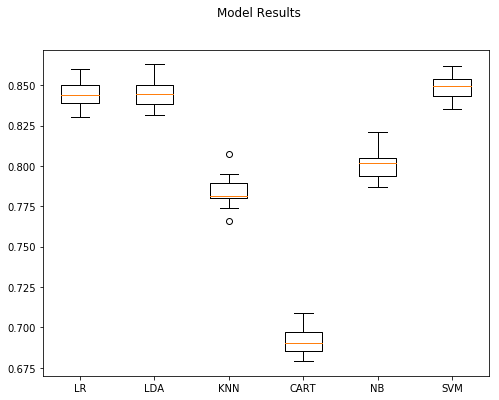

In [267]:
results, _df = trainModels(doc2vecModel.docvecs, df.iloc[:, 1], modelsToRun = 'all')
print(_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))
makeWhisker(results)

### Standard model comments

The first thing I noticed right away is how much faster training the set of models was.  Training wrapped up in about 9 mins compared to the sometimes hours required in previous write-ups.  Accuracy was also high being only two percentage points less then the baseline model:

|Model|Accuracy|Best Params                                      |
|-------------------|--------|-----------------------------------|
|LR (baseline)      |86.35%  |{'LR__C': 0.1, 'LR__penalty': 'l1'}|
|SVM centroid       |86.36%  |Scikit-learn defaults              |
|SVM Doc2Vec        |84.48%  |Scikit-learn defaults              |


Clearly for very large data sets the small drop in accuracy might be more than offset by the greatly reduced training time required.

# Tuning Doc2Vec

In [205]:
#doc2vecModel = Doc2Vec(vector_size = 100, min_count = 5, epochs = 60)
doc2vecModel = Doc2Vec(dm = 0, vector_size = 100, negative = 5, hs = 0, min_count = 2, sample = 0, epochs = 20, workers = cores)
doc2vecModel.build_vocab(taggedDocs)
doc2vecModel.train(taggedDocs, total_examples = doc2vecModel.corpus_count, epochs = doc2vecModel.epochs)

2018-11-06 13:44:06,922 : INFO : collecting all words and their counts
2018-11-06 13:44:06,922 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-11-06 13:44:07,306 : INFO : PROGRESS: at example #10000, processed 2385574 words (6121096/s), 51527 word types, 10000 tags
2018-11-06 13:44:07,705 : INFO : PROGRESS: at example #20000, processed 4747503 words (6001379/s), 67813 word types, 20000 tags
2018-11-06 13:44:07,893 : INFO : collected 74218 word types and 25000 unique tags from a corpus of 25000 examples and 5920713 words
2018-11-06 13:44:07,893 : INFO : Loading a fresh vocabulary
2018-11-06 13:44:07,973 : INFO : effective_min_count=2 retains 46350 unique words (62% of original 74218, drops 27868)
2018-11-06 13:44:07,973 : INFO : effective_min_count=2 leaves 5892845 word corpus (99% of original 5920713, drops 27868)
2018-11-06 13:44:08,083 : INFO : deleting the raw counts dictionary of 74218 items
2018-11-06 13:44:08,093 : INFO : sample=0 downsamples 

2018-11-06 13:44:36,269 : INFO : EPOCH 9 - PROGRESS: at 29.41% examples, 1751189 words/s, in_qsize 6, out_qsize 0
2018-11-06 13:44:37,262 : INFO : EPOCH 9 - PROGRESS: at 60.95% examples, 1812582 words/s, in_qsize 8, out_qsize 1
2018-11-06 13:44:38,264 : INFO : EPOCH 9 - PROGRESS: at 91.00% examples, 1795138 words/s, in_qsize 7, out_qsize 0
2018-11-06 13:44:38,526 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-06 13:44:38,526 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 13:44:38,536 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 13:44:38,536 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 13:44:38,536 : INFO : EPOCH - 9 : training on 5920713 raw words (5917845 effective words) took 3.3s, 1807650 effective words/s
2018-11-06 13:44:39,549 : INFO : EPOCH 10 - PROGRESS: at 31.74% examples, 1891650 words/s, in_qsize 8, out_qsize 0
2018-11-06 13:44:40,551 : INFO : EPOCH 10

2018-11-06 13:45:07,581 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 13:45:07,581 : INFO : EPOCH - 18 : training on 5920713 raw words (5917845 effective words) took 3.2s, 1849947 effective words/s
2018-11-06 13:45:08,602 : INFO : EPOCH 19 - PROGRESS: at 33.86% examples, 1987592 words/s, in_qsize 7, out_qsize 0
2018-11-06 13:45:09,612 : INFO : EPOCH 19 - PROGRESS: at 64.90% examples, 1906330 words/s, in_qsize 8, out_qsize 0
2018-11-06 13:45:10,615 : INFO : EPOCH 19 - PROGRESS: at 96.44% examples, 1884295 words/s, in_qsize 7, out_qsize 0
2018-11-06 13:45:10,726 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-06 13:45:10,726 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 13:45:10,727 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 13:45:10,730 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 13:45:10,732 : INFO : EPOCH - 19 : training on 592

In [207]:
# Init vars
folds = 10
seed = 10
models = []
results = {}

# Use accuracy since this is a classification
score = 'accuracy'

# Assign training features and labels
xTrain = doc2vecModel.docvecs
yTrain = df.iloc[:, 1]

# Instantiate model objects
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Create a Pandas DF to hold all our spiffy results
_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])

# Run the models
for modelName, model in models:
    print("Training", modelName, "....")
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = folds, random_state = seed)
    results[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = score)
    _df.loc[len(_df)] = list([modelName, results[modelName].mean(), results[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True])

Training LR ....
Training LDA ....
Training KNN ....
Training CART ....
Training NB ....
Training SVM ....


,Model,Accuracy,StdDev
5,SVM,0.88664,0.007875
0,LR,0.88428,0.007810
1,LDA,0.88384,0.007757
4,NB,0.85288,0.006137
2,KNN,0.81456,0.008471
3,CART,0.68624,0.004013


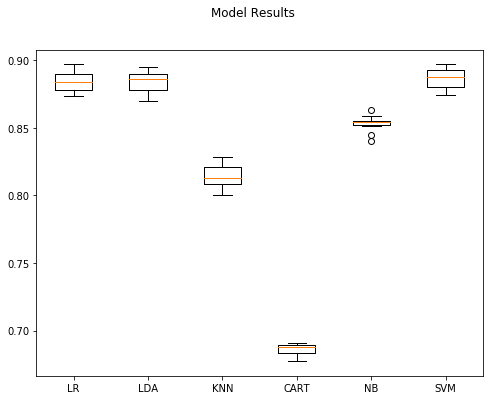

In [208]:
figure = plt.figure(figsize = (8,6))
figure.suptitle("Model Results")
axis = figure.add_subplot(111)
plt.boxplot(results.values())
axis.set_xticklabels(results.keys())
plt.show()

# Combining Doc2Vec models

https://markroxor.github.io/gensim/static/notebooks/doc2vec-IMDB.html

In [209]:
m1 = Doc2Vec(dm = 0, size = 100, negative = 5, hs = 0, min_count = 2, workers = cores)
m2 = Doc2Vec(dm = 1, dm_mean = 1, size = 100, window = 10, negative = 5, hs = 0, min_count = 2, workers = cores)

m1.build_vocab(taggedDocs)
m2.build_vocab(taggedDocs)

2018-11-06 14:01:24,850 : INFO : collecting all words and their counts
2018-11-06 14:01:24,850 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-11-06 14:01:25,220 : INFO : PROGRESS: at example #10000, processed 2385574 words (6585509/s), 51527 word types, 10000 tags
2018-11-06 14:01:25,623 : INFO : PROGRESS: at example #20000, processed 4747503 words (5787172/s), 67813 word types, 20000 tags
2018-11-06 14:01:25,821 : INFO : collected 74218 word types and 25000 unique tags from a corpus of 25000 examples and 5920713 words
2018-11-06 14:01:25,821 : INFO : Loading a fresh vocabulary
2018-11-06 14:01:26,041 : INFO : effective_min_count=2 retains 46350 unique words (62% of original 74218, drops 27868)
2018-11-06 14:01:26,041 : INFO : effective_min_count=2 leaves 5892845 word corpus (99% of original 5920713, drops 27868)
2018-11-06 14:01:26,161 : INFO : deleting the raw counts dictionary of 74218 items
2018-11-06 14:01:26,171 : INFO : sample=0.001 downsamp

In [210]:
alpha, min_alpha, passes = (0.025, 0.001, 20)

m1.train(taggedDocs, total_examples = m1.corpus_count, start_alpha = alpha, end_alpha = min_alpha, epochs = passes)
m2.train(taggedDocs, total_examples = m2.corpus_count, start_alpha = alpha, end_alpha = min_alpha, epochs = passes)

2018-11-06 14:01:41,613 : INFO : training model with 4 workers on 46350 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
2018-11-06 14:01:42,614 : INFO : EPOCH 1 - PROGRESS: at 29.54% examples, 1323352 words/s, in_qsize 7, out_qsize 0
2018-11-06 14:01:43,631 : INFO : EPOCH 1 - PROGRESS: at 60.24% examples, 1340001 words/s, in_qsize 7, out_qsize 0
2018-11-06 14:01:44,630 : INFO : EPOCH 1 - PROGRESS: at 90.32% examples, 1335165 words/s, in_qsize 6, out_qsize 1
2018-11-06 14:01:44,903 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-06 14:01:44,913 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 14:01:44,913 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 14:01:44,923 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 14:01:44,923 : INFO : EPOCH - 1 : training on 5920713 raw words (4440794 effective words) took 3.3s, 1343096 effective words/s
2018-1

2018-11-06 14:02:14,561 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 14:02:14,561 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 14:02:14,561 : INFO : EPOCH - 10 : training on 5920713 raw words (4441128 effective words) took 3.3s, 1342528 effective words/s
2018-11-06 14:02:15,575 : INFO : EPOCH 11 - PROGRESS: at 29.68% examples, 1333362 words/s, in_qsize 7, out_qsize 0
2018-11-06 14:02:16,581 : INFO : EPOCH 11 - PROGRESS: at 59.24% examples, 1322759 words/s, in_qsize 7, out_qsize 0
2018-11-06 14:02:17,591 : INFO : EPOCH 11 - PROGRESS: at 91.53% examples, 1350661 words/s, in_qsize 8, out_qsize 0
2018-11-06 14:02:17,888 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-06 14:02:17,898 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 14:02:17,898 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 14:02:17,898 : INFO : worker thread finished; awai

2018-11-06 14:02:47,426 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-06 14:02:47,436 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 14:02:47,446 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 14:02:47,446 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 14:02:47,446 : INFO : EPOCH - 20 : training on 5920713 raw words (4441051 effective words) took 3.3s, 1350671 effective words/s
2018-11-06 14:02:47,446 : INFO : training on a 118414260 raw words (88822050 effective words) took 65.8s, 1349152 effective words/s
2018-11-06 14:02:47,446 : INFO : training model with 4 workers on 46350 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2018-11-06 14:02:48,450 : INFO : EPOCH 1 - PROGRESS: at 20.36% examples, 920226 words/s, in_qsize 7, out_qsize 0
2018-11-06 14:02:49,452 : INFO : EPOCH 1 - PROGRESS: at 44.88% examples, 1001529 words/s, in_qsize 8,

2018-11-06 14:03:26,915 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 14:03:26,917 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 14:03:26,925 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 14:03:26,926 : INFO : EPOCH - 8 : training on 5920713 raw words (4442129 effective words) took 6.5s, 686836 effective words/s
2018-11-06 14:03:28,015 : INFO : EPOCH 9 - PROGRESS: at 16.79% examples, 752422 words/s, in_qsize 7, out_qsize 0
2018-11-06 14:03:29,049 : INFO : EPOCH 9 - PROGRESS: at 26.29% examples, 577492 words/s, in_qsize 8, out_qsize 0
2018-11-06 14:03:30,054 : INFO : EPOCH 9 - PROGRESS: at 34.68% examples, 510265 words/s, in_qsize 7, out_qsize 0
2018-11-06 14:03:31,071 : INFO : EPOCH 9 - PROGRESS: at 48.12% examples, 529483 words/s, in_qsize 7, out_qsize 0
2018-11-06 14:03:32,079 : INFO : EPOCH 9 - PROGRESS: at 64.58% examples, 567882 words/s, in_qsize 7, out_qsize 0
2018-11-06 14:03:33,106 :

2018-11-06 14:04:10,565 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 14:04:10,565 : INFO : EPOCH - 15 : training on 5920713 raw words (4440484 effective words) took 4.5s, 991651 effective words/s
2018-11-06 14:04:11,578 : INFO : EPOCH 16 - PROGRESS: at 21.18% examples, 952206 words/s, in_qsize 8, out_qsize 0
2018-11-06 14:04:12,587 : INFO : EPOCH 16 - PROGRESS: at 45.46% examples, 1007129 words/s, in_qsize 7, out_qsize 0
2018-11-06 14:04:13,594 : INFO : EPOCH 16 - PROGRESS: at 66.02% examples, 975651 words/s, in_qsize 7, out_qsize 0
2018-11-06 14:04:14,593 : INFO : EPOCH 16 - PROGRESS: at 87.32% examples, 969029 words/s, in_qsize 7, out_qsize 0
2018-11-06 14:04:15,146 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-06 14:04:15,156 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 14:04:15,156 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 14:04:15,156 : INFO : worker t

In [211]:
xTrain = []

for i in range(0, len(taggedDocs)):
    xTrain.append(np.hstack((m1.docvecs[i], m2.docvecs[i])))
    
len(xTrain)

25000

In [213]:
# Init vars
folds = 10
seed = 10
models = []
results = {}

# Use accuracy since this is a classification
score = 'accuracy'

# Assign training features and labels
#xTrain = doc2vecModel.docvecs.models[0].vectors_docs
yTrain = df.iloc[:, 1]

# Instantiate model objects
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Create a Pandas DF to hold all our spiffy results
_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])

# Run the models
for modelName, model in models:
    print("Training", modelName, "....")
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = folds, random_state = seed)
    results[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = score)
    _df.loc[len(_df)] = list([modelName, results[modelName].mean(), results[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True])

Training LR ....
Training LDA ....
Training KNN ....
Training CART ....
Training NB ....
Training SVM ....


,Model,Accuracy,StdDev
5,SVM,0.88764,0.008067
1,LDA,0.88604,0.007724
0,LR,0.88572,0.008335
2,KNN,0.80780,0.003796
4,NB,0.80348,0.007507
3,CART,0.69208,0.011092


In [ ]:
figure = plt.figure(figsize = (8,6))
figure.suptitle("Model Results")
axis = figure.add_subplot(111)
plt.boxplot(results.values())
axis.set_xticklabels(results.keys())
plt.show()

# Increased vocabulary and combined Doc2Vec models

In [214]:
# Pull in the unlabeled data since it can also be utilized by Doc2Vec
unlabeledTrainData = os.path.join(dataPath, 'unlabeledTrainData.tsv')
dfUn = pd.read_csv(unlabeledTrainData, sep = '\t', header = 0, quoting = 3)

In [219]:
allDocs = taggedDocs.copy()

for s in dfUn.iloc[:,1]:
    clean = cleanReview(s)
    i = len(allDocs)
    allDocs.append(TaggedDocument(clean, [i]))    
                   
len(allDocs)

75000

In [227]:
m1 = Doc2Vec(dm = 0, size = 100, negative = 5, hs = 0, min_count = 2, workers = cores)
m2 = Doc2Vec(dm = 1, dm_mean = 1, size = 100, window = 10, negative = 5, hs = 0, min_count = 2, workers = cores)

m1.build_vocab(allDocs)
m2.build_vocab(allDocs)


alpha, min_alpha, passes = (0.025, 0.001, 20)
m1.train(taggedDocs, total_examples = m1.corpus_count, start_alpha = alpha, end_alpha = min_alpha, epochs = passes)
m2.train(taggedDocs, total_examples = m2.corpus_count, start_alpha = alpha, end_alpha = min_alpha, epochs = passes)

xTrain = []
for i in range(0, len(taggedDocs)):
    xTrain.append(np.hstack((m1.docvecs[i], m2.docvecs[i])))

print(len(xTrain))

2018-11-06 16:05:21,208 : INFO : collecting all words and their counts
2018-11-06 16:05:21,208 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-11-06 16:05:21,609 : INFO : PROGRESS: at example #10000, processed 2385574 words (6098816/s), 51527 word types, 10000 tags
2018-11-06 16:05:21,999 : INFO : PROGRESS: at example #20000, processed 4747503 words (6032845/s), 67813 word types, 20000 tags
2018-11-06 16:05:22,379 : INFO : PROGRESS: at example #30000, processed 7100124 words (6148842/s), 81670 word types, 30000 tags
2018-11-06 16:05:22,774 : INFO : PROGRESS: at example #40000, processed 9467843 words (6046613/s), 93389 word types, 40000 tags
2018-11-06 16:05:23,198 : INFO : PROGRESS: at example #50000, processed 11865784 words (5626798/s), 103474 word types, 50000 tags
2018-11-06 16:05:23,608 : INFO : PROGRESS: at example #60000, processed 14248889 words (5879829/s), 112175 word types, 60000 tags
2018-11-06 16:05:23,989 : INFO : PROGRESS: at example

2018-11-06 16:05:49,041 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-06 16:05:49,051 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 16:05:49,051 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:05:49,051 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 16:05:49,051 : INFO : EPOCH - 5 : training on 5920713 raw words (4454874 effective words) took 3.3s, 1330404 effective words/s
2018-11-06 16:05:49,051 : WARNING : EPOCH - 5 : supplied example count (25000) did not equal expected count (75000)
2018-11-06 16:05:50,057 : INFO : EPOCH 6 - PROGRESS: at 10.62% examples, 1428561 words/s, in_qsize 7, out_qsize 0
2018-11-06 16:05:51,066 : INFO : EPOCH 6 - PROGRESS: at 20.73% examples, 1389035 words/s, in_qsize 7, out_qsize 0
2018-11-06 16:05:52,051 : INFO : EPOCH 6 - PROGRESS: at 30.86% examples, 1373990 words/s, in_qsize 7, out_qsize 0
2018-11-06 16:05:52,299 : INFO : worker 

2018-11-06 16:06:16,380 : WARNING : EPOCH - 13 : supplied example count (25000) did not equal expected count (75000)
2018-11-06 16:06:17,388 : INFO : EPOCH 14 - PROGRESS: at 10.41% examples, 1392208 words/s, in_qsize 7, out_qsize 0
2018-11-06 16:06:18,392 : INFO : EPOCH 14 - PROGRESS: at 19.75% examples, 1324413 words/s, in_qsize 7, out_qsize 0
2018-11-06 16:06:19,383 : INFO : EPOCH 14 - PROGRESS: at 28.81% examples, 1283575 words/s, in_qsize 8, out_qsize 0
2018-11-06 16:06:19,879 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-06 16:06:19,879 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 16:06:19,879 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:06:19,879 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 16:06:19,879 : INFO : EPOCH - 14 : training on 5920713 raw words (4453306 effective words) took 3.5s, 1272606 effective words/s
2018-11-06 16:06:19,879 : WARNING :

2018-11-06 16:06:46,329 : INFO : EPOCH 2 - PROGRESS: at 6.84% examples, 925831 words/s, in_qsize 7, out_qsize 0
2018-11-06 16:06:47,349 : INFO : EPOCH 2 - PROGRESS: at 14.16% examples, 945765 words/s, in_qsize 7, out_qsize 0
2018-11-06 16:06:48,359 : INFO : EPOCH 2 - PROGRESS: at 21.63% examples, 959123 words/s, in_qsize 8, out_qsize 0
2018-11-06 16:06:49,361 : INFO : EPOCH 2 - PROGRESS: at 28.48% examples, 947189 words/s, in_qsize 8, out_qsize 0
2018-11-06 16:06:49,958 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-06 16:06:49,958 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 16:06:49,958 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:06:49,968 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 16:06:49,968 : INFO : EPOCH - 2 : training on 5920713 raw words (4454327 effective words) took 4.6s, 960212 effective words/s
2018-11-06 16:06:49,968 : WARNING : EPOCH - 2 : 

2018-11-06 16:07:23,369 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 16:07:23,379 : INFO : EPOCH - 9 : training on 5920713 raw words (4454947 effective words) took 4.7s, 940008 effective words/s
2018-11-06 16:07:23,379 : WARNING : EPOCH - 9 : supplied example count (25000) did not equal expected count (75000)
2018-11-06 16:07:24,389 : INFO : EPOCH 10 - PROGRESS: at 6.58% examples, 884699 words/s, in_qsize 7, out_qsize 0
2018-11-06 16:07:25,401 : INFO : EPOCH 10 - PROGRESS: at 13.94% examples, 927969 words/s, in_qsize 8, out_qsize 0
2018-11-06 16:07:26,412 : INFO : EPOCH 10 - PROGRESS: at 20.93% examples, 929838 words/s, in_qsize 7, out_qsize 0
2018-11-06 16:07:27,430 : INFO : EPOCH 10 - PROGRESS: at 28.25% examples, 936302 words/s, in_qsize 7, out_qsize 0
2018-11-06 16:07:28,090 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-06 16:07:28,118 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 16:07:28

2018-11-06 16:08:00,453 : INFO : EPOCH 17 - PROGRESS: at 27.15% examples, 904712 words/s, in_qsize 7, out_qsize 0
2018-11-06 16:08:01,337 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-06 16:08:01,338 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 16:08:01,346 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:08:01,366 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 16:08:01,366 : INFO : EPOCH - 17 : training on 5920713 raw words (4454302 effective words) took 4.9s, 905569 effective words/s
2018-11-06 16:08:01,366 : WARNING : EPOCH - 17 : supplied example count (25000) did not equal expected count (75000)
2018-11-06 16:08:02,375 : INFO : EPOCH 18 - PROGRESS: at 5.61% examples, 760906 words/s, in_qsize 7, out_qsize 0
2018-11-06 16:08:03,375 : INFO : EPOCH 18 - PROGRESS: at 12.13% examples, 820260 words/s, in_qsize 7, out_qsize 0
2018-11-06 16:08:04,369 : INFO : EPOCH 1

25000

In [228]:
# Init vars
folds = 10
seed = 10
models = []
results = {}

# Use accuracy since this is a classification
score = 'accuracy'

# Assign training features and labels
#xTrain = doc2vecModel.docvecs.models[0].vectors_docs
yTrain = df.iloc[:, 1]

# Instantiate model objects
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Create a Pandas DF to hold all our spiffy results
_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])

# Run the models
for modelName, model in models:
    print("Training", modelName, "....")
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = folds, random_state = seed)
    results[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = score)
    _df.loc[len(_df)] = list([modelName, results[modelName].mean(), results[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
print(_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))

Training LR ....
Training LDA ....
Training SVM ....
  Model  Accuracy    StdDev
2   SVM   0.88684  0.008090
1   LDA   0.88572  0.006350
0    LR   0.88548  0.006337


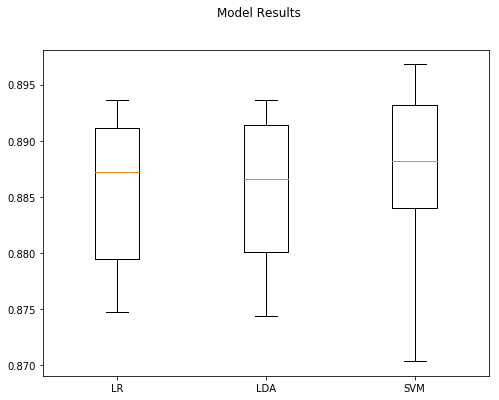

In [229]:
figure = plt.figure(figsize = (8,6))
figure.suptitle("Model Results")
axis = figure.add_subplot(111)
plt.boxplot(results.values())
axis.set_xticklabels(results.keys())
plt.show()

# Manual training of combined Doc2Vec model with increased vocab and diminishing alpha

In [241]:
def trainModels(xTrain, yTrain, modelsToRun = ['LR', 'LDA', 'SVM']):
    # Init vars
    folds = 10
    seed = 10
    models = []
    results = {}

    # Use accuracy since this is a classification
    score = 'accuracy'
    
    # Instantiate model objects
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))

    # Create a Pandas DF to hold all our spiffy results
    _df = pd.DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])

    # Run the models
    for modelName, model in models:
        if (modelName in modelsToRun) or (modelsToRun == 'all'):
            print("Training", modelName, "....")
            # Implement K-fold cross validation where K = 10
            kFold = KFold(n_splits = folds, random_state = seed)
            results[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = score)
            _df.loc[len(_df)] = list([modelName, results[modelName].mean(), results[modelName].std()])

    # Print results sorted by Mean desc, StdDev asc, Model asc
    return(results, _df)

In [242]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

results, _df = trainModels(xTrain, yTrain, modelsToRun = ['LR', 'LDA'])
print(_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))



  0%|          | 0/6 [00:00<?, ?it/s]

Training LR ....




 17%|█▋        | 1/6 [00:14<01:10, 14.11s/it]

Training LDA ....




 33%|███▎      | 2/6 [00:17<00:44, 11.03s/it]

100%|██████████| 6/6 [00:17<00:00,  2.99s/it]

  Model  Accuracy    StdDev
1   LDA   0.88572  0.006350
0    LR   0.88548  0.006337


# Summary

In [76]:
%%html
<style>
table {float:left}
</style>

In this write-up we accomplished the following:

1. Created a set of word embeddings from the IMDb movie review text utilizing Word2vec
2. Clustered the embeddings utilizing a K-nearest neighbors algorithm into a set of centroids
3. Trained and evaluated the models from the last write-up against the centroid feature set

And finally, here is the baseline model's performance vs. the 'centroid' model we developed in this write-up:

|Model|Accuracy|Best Params                           |
|-------------------|--------|-----------------------------------|
|LR (baseline)      |86.35%  |{'LR__C': 0.1, 'LR__penalty': 'l1'}|
|Kaggle centroid    |84.68%  |Estimators = 100                   |
|SVM centroid       |86.36%  |Scikit-learn defaults              |

<div style="clear: both;"></div>

Similar to the last [last write-up](./Model-06.p2.ipynb) the work in this notebook was an interesting idea to explore, but ultimately didn't result in an overall performance increase versus the baseline model.  As such this line of exploration will be rejected in favor of keeping the current base line model and accuracy rating as benchmarks moving forward.